<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Stastical/kriging_regression_example_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import unittest
import numpy as np
import GPy

from sklearn.metrics import r2_score # metrics to evaluate the model r2_score
from sklearn.metrics import mean_absolute_error # metrics to evaluate the model mean absolute error
from sklearn.metrics import mean_squared_error # metrics to evaluate the model mean squared error
import matplotlib.pyplot as plt

In [ ]:
# Ceate a dataset of 20 points adding 
# the dependent variable Y has a random uniform noisy
X = np.random.uniform(-3.,3.,(20,1))
Y = np.exp(X) + np.random.randn(20,1)*0.05

In [ ]:
# We can choose different kenels including Gaussian and Matenr
# the Matern kern is a generalization of Gaussian kernel
# if you replace the Matern52 by RBF the code will work using Gaussian 
# but in both cases it is necessary to tune the parameters

#kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
kernel = GPy.kern.Matern52(input_dim=1)

In [ ]:
# First part we define the model providing the kernel and dataset
m = GPy.models.GPRegression(X,Y,kernel)


In [ ]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
Mat52.variance,1.0,+ve,
Mat52.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


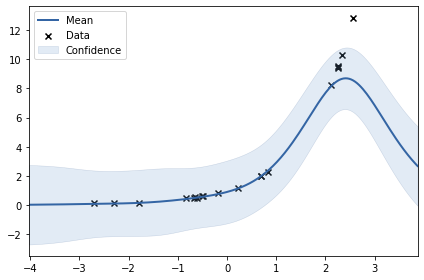

In [ ]:
fig = m.plot()
# as observed in fig the stadard deviation without parameters tune are big 
# considering the confidence interval of values estimated

In [ ]:
m.optimize(messages=True)
# in order to have a better results the fuction optimize is defined to tune the parameters
# ps: the default method to optimize is 'bfgs' (quasi newton method)

In [ ]:
# once the fucntion optimize is defined the parameters of krig can be optimized 
# using optimize_restart
m.optimize_restarts(num_restarts = 10)

 /usr/local/lib/python3.7/dist-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/10, f = -1.0490964854606872
Optimization restart 2/10, f = -1.0490964855286755
Optimization restart 3/10, f = -1.0490964827455684
Optimization restart 4/10, f = -1.0490964861647996
Optimization restart 5/10, f = -1.0490964806429766
Optimization restart 6/10, f = -1.049096485037012
Optimization restart 7/10, f = -1.0490964836133116
Optimization restart 8/10, f = -1.0490964808761731
Optimization restart 9/10, f = -1.0490964821545
Optimization restart 10/10, f = -1.0490964844237176


In [ ]:
# all possible informations present in the model can be 
# listed using dir(model_name) ps: in our case the name is m
len(dir(m))

222

In [ ]:
# noise in model:
m.Gaussian_noise

Gaussian_noise.,value,constraints,priors
variance,0.001261121102819521,+ve,


In [ ]:
m.parameters

In [ ]:
m.param_array

array([2.33410056e+03, 8.01188845e+00, 1.26112110e-03])

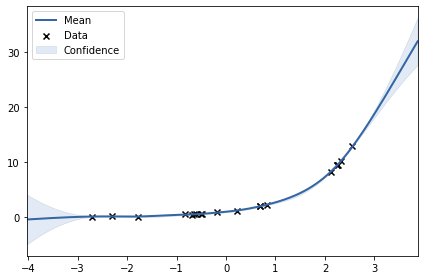

In [ ]:
fig = m.plot()
# after optimize we can observe the confidence 
# interval sugest the model is tunned 
# after tune we can observe the confidence interval suggeting values close to experimental 
# in regions where there is experimental points. 

In [ ]:
# obtaining the value of y_pred (y_mean) and standard deviation (y_std) for each point
y_mean, y_std = m.predict(X.reshape(-1, 1))
noise = Y - y_mean

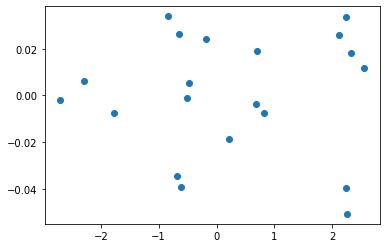

In [ ]:
plt.scatter(X,noise)

In [ ]:
# writing the metrics:
print('r^2 score =',r2_score(Y, y_mean))
print('MAE =',mean_absolute_error(Y, y_mean))
print('MSQE =',mean_squared_error(Y, y_mean))

r^2 score = 0.9999661067909508
MAE = 0.02046345293419295
MSQE = 0.0006241297535316331
